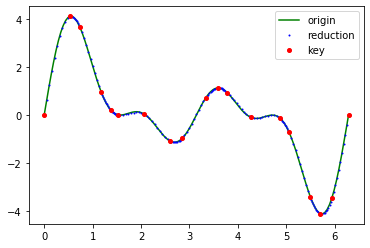

In [1]:
import matplotlib.pyplot as plt
from math import *
import animation
from keyframe import *

N  = 128
x = []
y = []
in_data = []
n = N
for t in [x * 2 * pi / n for x in range(n + 1)]:
    _x = t
    _y = sin(t) + 2*sin(2*t) + sin(3*t) + sin(4*t)
    x.append(_x)
    y.append(_y)
    in_data.append((_x, _y))

plt.plot(x, y, 'g', label='origin')

out_data = animation.simplify(in_data, 0.05)
out_KeyFrame = []
rox = []
roy = []
for i in list(range(len(out_data))):
    o_time = out_data[i][0]
    o_value = out_data[i][1]
    o_left_tan = out_data[i][2]
    o_right_tan = out_data[i][3]

    o_key = KeyFrame(o_time, o_value, o_left_tan, o_right_tan)
    out_KeyFrame.append(o_key)
    rox.append(o_time)
    roy.append(o_value)

iter_num = 10
ox = []
oy = []
for i in list(range(len(out_KeyFrame) - 1)):
    for t in list(range(iter_num)):
        cur_time = out_KeyFrame[i].time + (out_KeyFrame[i + 1].time - out_KeyFrame[i].time) / iter_num * t
        cur_value = evaluate_internal(cur_time, out_KeyFrame[i], out_KeyFrame[i + 1])
        ox.append(cur_time)
        oy.append(cur_value)

plt.plot(ox, oy, "bo", markersize=1, label='reduction')
plt.plot(rox, roy, 'ro', markersize=4, label='key')
plt.legend()
